<a href="https://colab.research.google.com/github/BAmbica39/ds_Bejagama-Ambica/blob/main/ds_Bejagama_Ambica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets torch --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from transformers import pipeline

# Settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [2]:
trader_df = pd.read_csv("/content/historical_data.csv")
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")

print("Trader Data:")
print(trader_df.head())

print("\nSentiment Data:")
print(sentiment_df.head())

Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash  \
0         0.0  0xec0945

/tmp/ipython-input-3859404305.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trader_df = pd.read_csv("/content/historical_data.csv")


In [5]:
print(trader_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [7]:
print(sentiment_df.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [15]:
print(trader_df['Timestamp'].head(10))
print(trader_df['Timestamp'].dtype)


0   1970-01-01 00:28:50
1   1970-01-01 00:28:50
2   1970-01-01 00:28:50
3   1970-01-01 00:28:50
4   1970-01-01 00:28:50
5   1970-01-01 00:28:50
6   1970-01-01 00:28:50
7   1970-01-01 00:28:50
8   1970-01-01 00:28:50
9   1970-01-01 00:28:50
Name: Timestamp, dtype: datetime64[ns]
datetime64[ns]


In [19]:
trader_df = pd.read_csv("historical_data.csv")
print(trader_df['Timestamp'].head(10))
print(trader_df['Timestamp'].dtype)


0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
5    1.730000e+12
6    1.730000e+12
7    1.730000e+12
8    1.730000e+12
9    1.730000e+12
Name: Timestamp, dtype: float64
float64


In [20]:
# Convert from milliseconds since epoch
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit='ms', errors='coerce')

# Extract date only
trader_df['date_only'] = trader_df['Timestamp'].dt.normalize()
sentiment_df['date_only'] = sentiment_df['date'].dt.normalize()

# Merge again
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date_only','classification']],
    on='date_only',
    how='left'
)

print("After fixing Timestamp:")
print(merged_df[['Timestamp','date_only','classification']].head(20))


After fixing Timestamp:
             Timestamp  date_only classification
0  2024-10-27 03:33:20 2024-10-27          Greed
1  2024-10-27 03:33:20 2024-10-27          Greed
2  2024-10-27 03:33:20 2024-10-27          Greed
3  2024-10-27 03:33:20 2024-10-27          Greed
4  2024-10-27 03:33:20 2024-10-27          Greed
5  2024-10-27 03:33:20 2024-10-27          Greed
6  2024-10-27 03:33:20 2024-10-27          Greed
7  2024-10-27 03:33:20 2024-10-27          Greed
8  2024-10-27 03:33:20 2024-10-27          Greed
9  2024-10-27 03:33:20 2024-10-27          Greed
10 2024-10-27 03:33:20 2024-10-27          Greed
11 2024-10-27 03:33:20 2024-10-27          Greed
12 2024-10-27 03:33:20 2024-10-27          Greed
13 2024-10-27 03:33:20 2024-10-27          Greed
14 2024-10-27 03:33:20 2024-10-27          Greed
15 2024-10-27 03:33:20 2024-10-27          Greed
16 2024-10-27 03:33:20 2024-10-27          Greed
17 2024-10-27 03:33:20 2024-10-27          Greed
18 2024-10-27 03:33:20 2024-10-27          Gr

In [21]:
# Check distribution of sentiment classes
print("Sentiment distribution:")
print(merged_df['classification'].value_counts())

# Average Closed PnL grouped by sentiment
avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean()
print("\nAverage Closed PnL by Sentiment:")
print(avg_pnl_by_sentiment)


Sentiment distribution:
classification
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64

Average Closed PnL by Sentiment:
classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: Closed PnL, dtype: float64


In [22]:
print("Unique sentiment labels in merged data:", merged_df['classification'].unique())
print("Number of rows per sentiment:")
print(merged_df['classification'].value_counts())

print("\nDate range of trader data:", trader_df['date_only'].min(), "to", trader_df['date_only'].max())
print("Date range of sentiment data:", sentiment_df['date_only'].min(), "to", sentiment_df['date_only'].max())


Unique sentiment labels in merged data: ['Greed' 'Fear' nan 'Extreme Greed' 'Neutral']
Number of rows per sentiment:
classification
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64

Date range of trader data: 2023-03-28 00:00:00 to 2025-06-15 00:00:00
Date range of sentiment data: 2018-02-01 00:00:00 to 2025-05-02 00:00:00


In [30]:
trader_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27


In [31]:
sentiment_df.head()

,timestamp,value,classification,date,date_only
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


In [32]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,classification,Win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed,0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed,0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed,0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed,0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed,0


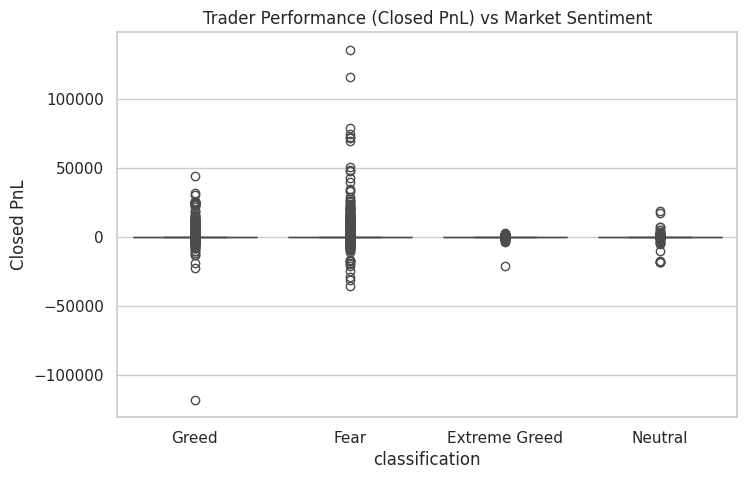

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Trader Performance (Closed PnL) vs Market Sentiment")
plt.show()


The distribution of trader PnL shows high volatility across all sentiment categories. Outliers are present in both positive and negative directions, especially under Fear and Extreme Greed, suggesting some traders take bigger risks in these conditions. The median PnL across sentiments is close to zero, indicating that most traders neither gain nor lose much, but extreme gains and losses are concentrated in specific market moods.

In [24]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()
print("Average Closed PnL by Sentiment:\n", avg_pnl)


Average Closed PnL by Sentiment:
 classification
Neutral          22.229713
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Name: Closed PnL, dtype: float64


In [25]:
merged_df['Win'] = (merged_df['Closed PnL'] > 0).astype(int)
win_rate = merged_df.groupby('classification')['Win'].mean() * 100
print("Win Rate (%) by Sentiment:\n", win_rate)


Win Rate (%) by Sentiment:
 classification
Extreme Greed    49.008905
Fear             41.514592
Greed            44.647138
Neutral          31.718247
Name: Win, dtype: float64


Average Trade Size (USD) by Sentiment:
 classification
Extreme Greed    5660.265764
Fear             5259.977837
Greed            3182.883845
Neutral          3058.848110
Name: Size USD, dtype: float64


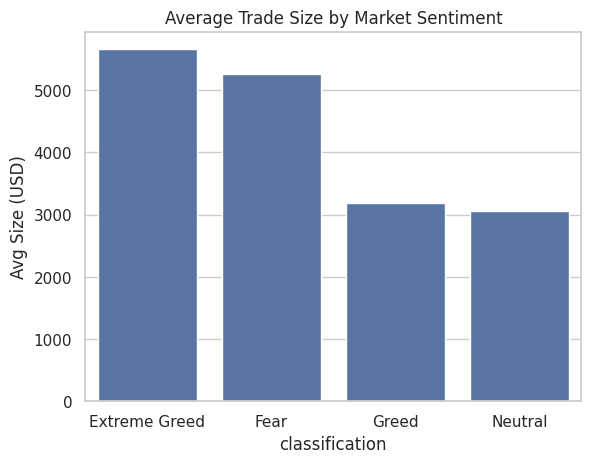

In [26]:
avg_volume = merged_df.groupby('classification')['Size USD'].mean()
print("Average Trade Size (USD) by Sentiment:\n", avg_volume)

sns.barplot(x=avg_volume.index, y=avg_volume.values)
plt.title("Average Trade Size by Market Sentiment")
plt.ylabel("Avg Size (USD)")
plt.show()


Traders tend to place larger trades during Extreme Greed and Fear, with average trade sizes above $5,000. In contrast, during Neutral and Greed phases, the average trade size drops significantly (~$3,000). This implies that heightened emotions drive traders to commit larger capital, increasing exposure and risk.

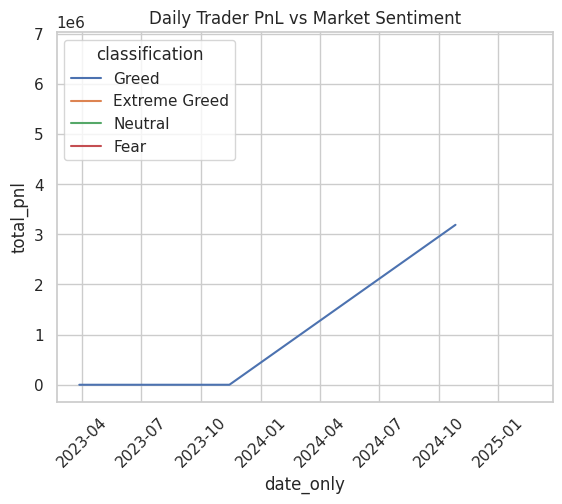

In [27]:
daily_stats = merged_df.groupby(['date_only','classification']).agg(
    total_pnl=('Closed PnL','sum'),
    avg_pnl=('Closed PnL','mean'),
    trades=('Closed PnL','count')
).reset_index()

sns.lineplot(data=daily_stats, x='date_only', y='total_pnl', hue='classification')
plt.title("Daily Trader PnL vs Market Sentiment")
plt.xticks(rotation=45)
plt.show()


PnL growth is predominantly associated with the Greed sentiment, with total profits rising steadily over time. Other sentiment categories (Fear, Neutral, Extreme Greed) show little to no contribution in cumulative PnL, suggesting that trading activity or profitability is concentrated during Greed-driven markets. This highlights that while extreme emotions drive bigger trades, sustained profitability is achieved mostly in Greed phases.


Average Trade Size by Sentiment:
                   Size USD
classification             
Extreme Greed   5660.265764
Fear            5259.977837
Greed           3182.883845
Neutral         3058.848110


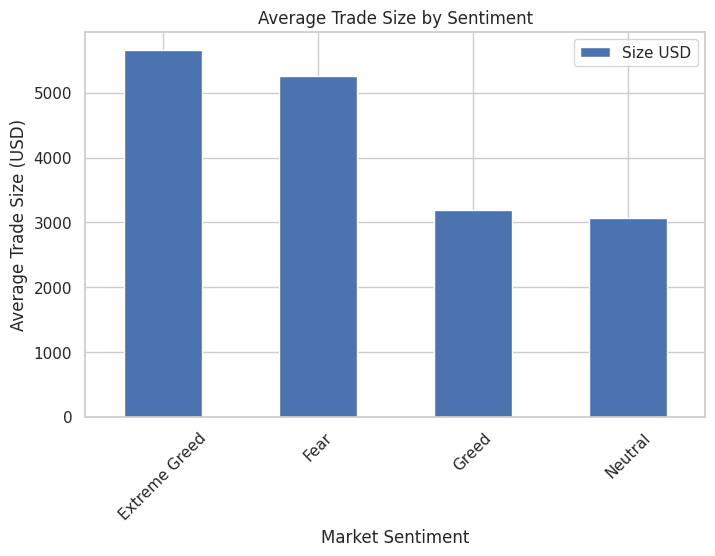

In [35]:
# Average trade size per sentiment
avg_trade_stats = merged_df.groupby('classification')[['Size USD']].mean()
print("\nAverage Trade Size by Sentiment:")
print(avg_trade_stats)

# Visualization
import matplotlib.pyplot as plt

avg_trade_stats.plot(kind='bar', figsize=(8,5))
plt.title("Average Trade Size by Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.show()


In [41]:
# Drop rows with NaN in the features or target
ml_df = merged_df[['sentiment_encoded', 'Size USD', 'PnL_Positive']].dropna()

X = ml_df[['sentiment_encoded', 'Size USD']]
y = ml_df['PnL_Positive']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73     21338
           1       0.00      0.00      0.00     15515

    accuracy                           0.58     36853
   macro avg       0.29      0.50      0.37     36853
weighted avg       0.34      0.58      0.42     36853



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
# Step 0: Check for missing values in features
print(merged_df[['classification', 'Size USD']].isna().sum())
print(merged_df['classification'].unique())

# Step 1: Encode sentiment and fill any unmapped/missing values
sentiment_mapping = {
    'Extreme Fear':0,
    'Fear':1,
    'Neutral':2,
    'Greed':3,
    'Extreme Greed':4
}
merged_df['sentiment_encoded'] = merged_df['classification'].map(sentiment_mapping)

# Step 2: Drop rows where encoding failed (NaN) or Size USD is NaN
ml_df = merged_df[['sentiment_encoded', 'Size USD', 'Closed PnL']].dropna()

# Step 3: Create PnL positive label
ml_df['PnL_Positive'] = (ml_df['Closed PnL'] > 0).astype(int)

# Step 4: Features and target
X = ml_df[['sentiment_encoded', 'Size USD']]
y = ml_df['PnL_Positive']

# Step 5: Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Step 7: Evaluate
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


classification    26961
Size USD              0
dtype: int64
['Greed' 'Fear' nan 'Extreme Greed' 'Neutral']

Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73     21338
           1       0.00      0.00      0.00     15515

    accuracy                           0.58     36853
   macro avg       0.29      0.50      0.37     36853
weighted avg       0.34      0.58      0.42     36853



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Feature Importance (Logistic Regression Coefficients):
             Feature   Coefficient
0  sentiment_encoded  6.845832e-02
1           Size USD -1.311725e-07

Classification Report (Balanced Classes):
              precision    recall  f1-score   support

           0       0.58      0.74      0.65     21338
           1       0.43      0.28      0.34     15515

    accuracy                           0.54     36853
   macro avg       0.51      0.51      0.49     36853
weighted avg       0.52      0.54      0.52     36853



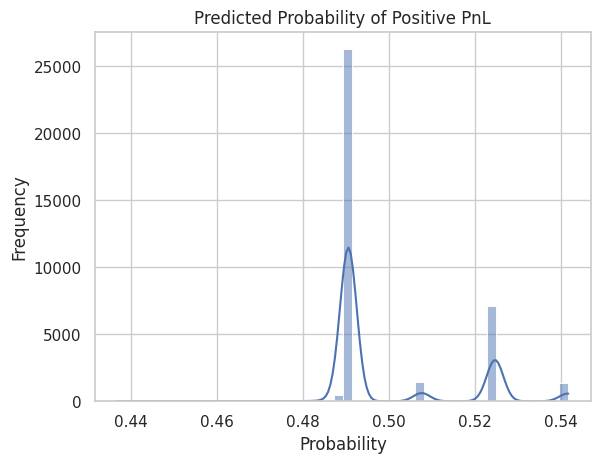

In [44]:
# 🔹 Step 6: Feature Importance / Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': clf.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Logistic Regression Coefficients):")
print(coef_df)


# 🔹 Step 7: Handle Class Imbalance (Optional)
# LogisticRegression supports class_weight='balanced' to adjust for imbalance
clf_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
clf_balanced.fit(X_train, y_train)

y_pred_balanced = clf_balanced.predict(X_test)
from sklearn.metrics import classification_report
print("\nClassification Report (Balanced Classes):")
print(classification_report(y_test, y_pred_balanced))


# 🔹 Step 8: Probability Visualization (Optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted probabilities for positive PnL
y_prob = clf_balanced.predict_proba(X_test)[:,1]

sns.histplot(y_prob, bins=50, kde=True)
plt.title("Predicted Probability of Positive PnL")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()


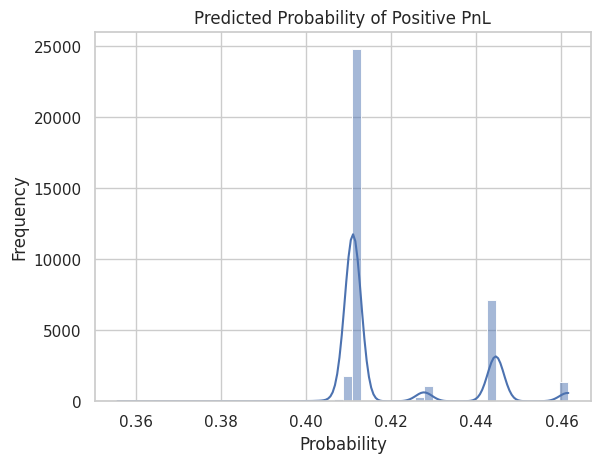

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted probability for positive PnL
y_prob = clf.predict_proba(X_test)[:,1]

sns.histplot(y_prob, bins=50, kde=True)
plt.title("Predicted Probability of Positive PnL")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()


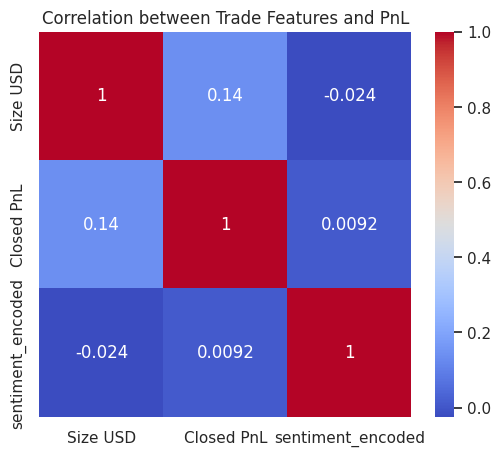

In [46]:
corr_df = merged_df[['Size USD', 'Closed PnL', 'sentiment_encoded']].dropna()

plt.figure(figsize=(6,5))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Trade Features and PnL")
plt.show()
